# Global Power Plant Database Project

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Global_power_plant_database_project.csv')

In [7]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df.head()

In [4]:
df.shape

(908, 25)

There are 908 rows and 25 columns.

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Dataframe description:
    

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



It is a linear regression problem.

# Checking the data types of the columns

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Checking null values

In [9]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

 There are 46 missing values in 'latitude' column,46 missing values in 'longitude'column,709 in other_fuel_1,907 in other_fuel2,908 inother_fuel3,380 in commissioning_year,566 in owner,19 in geolocation_source,908 inwepp_id ,388 inyear_of_capacity_data ,524 in generation_gwh_2013,507 in  generation_gwh_2014,483 in generation_gwh2015,471 in generation_gwh2016,465 in generation_gwh2017,458 in generation_data_source and 908 in estimated_generation_gwh. 

All these null values haveto be treated

# Heatmap for the representation of null values


<AxesSubplot:>

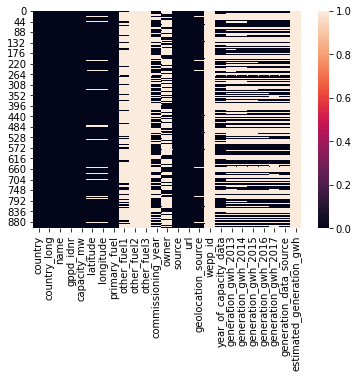

In [10]:
sns.heatmap(df.isnull())

The heat map aslo shows the presence of null values  

# Outliers

outliers can be checked withthe help of boxplot

capacity_mw                    AxesSubplot(0.125,0.536818;0.065678x0.343182)
latitude                    AxesSubplot(0.203814,0.536818;0.065678x0.343182)
longitude                   AxesSubplot(0.282627,0.536818;0.065678x0.343182)
other_fuel3                 AxesSubplot(0.361441,0.536818;0.065678x0.343182)
commissioning_year          AxesSubplot(0.440254,0.536818;0.065678x0.343182)
wepp_id                     AxesSubplot(0.519068,0.536818;0.065678x0.343182)
year_of_capacity_data       AxesSubplot(0.597881,0.536818;0.065678x0.343182)
generation_gwh_2013         AxesSubplot(0.676695,0.536818;0.065678x0.343182)
generation_gwh_2014         AxesSubplot(0.755508,0.536818;0.065678x0.343182)
generation_gwh_2015         AxesSubplot(0.834322,0.536818;0.065678x0.343182)
generation_gwh_2016               AxesSubplot(0.125,0.125;0.065678x0.343182)
generation_gwh_2017            AxesSubplot(0.203814,0.125;0.065678x0.343182)
estimated_generation_gwh       AxesSubplot(0.282627,0.125;0.065678x0.343182)

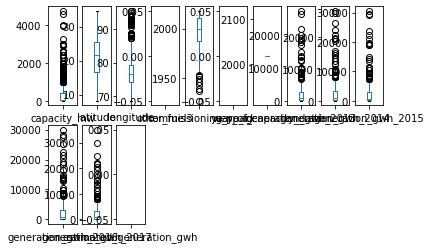

In [12]:
df.plot(kind='box',subplots=True,layout=(2,10))

# Skewness

In [16]:
df.skew()

capacity_mw                 3.193257
latitude                   -0.143622
longitude                   1.100942
other_fuel3                      NaN
commissioning_year         -1.056132
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013         3.416338
generation_gwh_2014         3.357683
generation_gwh_2015         3.679016
generation_gwh_2016         3.524785
generation_gwh_2017         3.576849
estimated_generation_gwh         NaN
dtype: float64

Graphical Representation of skewness